<a href="https://colab.research.google.com/github/dan-a-iancu/airm/blob/master/Starbux/S09_10_AIRM_Starbux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bean to Powder: Sourcing, Processing and Pricing of Cocoa at Starbux**

This notebook implements a full solution to the mini-case, walking you through different types of analytics.

In [9]:
#@title **Basic Setup.** We start by importing a few useful modules and reading the data in.
#@markdown *Click on the "play" button on the left to run this entire cell.*
import numpy as np

import urllib.request  # for file downloading

# Import pandas for data-frames
import pandas as pd
pd.options.display.max_rows = 15
pd.options.display.float_format = "{:,.2f}".format

# Make sure Matplotlib runs inline, for nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import matplotlib.ticker as ticker 

# Ignore useless some warnings
import warnings
warnings.simplefilter(action="ignore")

# Read all the necessary data files
url_Q1 = "https://raw.githubusercontent.com/dan-a-iancu/airm/master/Starbux/S01_Starbux_market_data.csv"
local_file_Q1 = "S01_Starbux_market_data.csv"   # name of local file where you want to store the downloaded file
aux = urllib.request.urlretrieve(url_Q1, local_file_Q1)    # download from website and save it locally

url_Q3 = "https://raw.githubusercontent.com/dan-a-iancu/airm/master/Starbux/S01_Starbux_scenarios.csv"
local_file_Q3 = "S01_Starbux_scenarios.csv"   # name of local file where you want to store the downloaded file
aux = urllib.request.urlretrieve(url_Q3, local_file_Q3)    # download from website and save it locally

print("Completed successfully!")

Completed successfully!


<a id='top'></a>
&nbsp;&nbsp;&nbsp;&nbsp;[Q1. A Predictive Model with More Complex Dependencies](#Q1)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q2. Prescriptive Analytics and Optimization](#Q2)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q3. A Simulation Model](#Q3)  
&nbsp;&nbsp;&nbsp;&nbsp;[Q4. Decisions Under Uncertainty](#Q4)  

<a id="Q1"></a>
# **Q1.**

We will construct a model to predict Starbux's gross profit. 

*Expand the section for details.*

Let's create a python function that returns the gross profits and price for a given set of parameters.

In [5]:
#@markdown Define a function to calculate gross profit given all problem parameters
def calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                           RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                           DemandIntercept, DemandSlope, Price_Powder):

  # demand and sales
  Demand_Powder = max(0, DemandIntercept + DemandSlope * Price_Powder)
  Sales_Powder = Demand_Powder

  # sourcing quantities
  Beans_Contract = Sales_Powder*ContractPercent
  Beans_OpenMarket = Sales_Powder - Beans_Contract*Yield
  Beans_Total = Beans_Contract + Beans_OpenMarket

  # roasting and processing
  AmountRoasted_Total = Beans_Total
  AmountRoasted_InHouse = min(AmountRoasted_Total, RoastingCapacity)
  AmountRoasted_Outsourced = AmountRoasted_Total - AmountRoasted_InHouse

  # revenues
  Revenues = Sales_Powder * Price_Powder

  # costs
  Cost_SourcingContract = Beans_Contract * ContractPrice
  Cost_OpenMarket = Beans_OpenMarket * OpenMarketPrice
  Cost_Roasting_InHouse = AmountRoasted_InHouse * RoastingCostInHouse 
  Cost_Roasting_Outsourced = AmountRoasted_Outsourced * RoastingCostOutsourced
  Cost_Fixed = FixedCosts if (AmountRoasted_InHouse > 0) else 0
  Cost_Total = Cost_SourcingContract + Cost_OpenMarket + Cost_Roasting_InHouse + Cost_Roasting_Outsourced + Cost_Fixed

  # gross profit   
  return Revenues - Cost_Total

print("Function defined successfully.")

Function defined successfully.


Now let's use the function to calculate the profit for our given data in Question 1.

In [6]:
#@markdown Calculate and display the gross profit for Q1
# contract
ContractPercent = 0.60
ContractPrice = 1.50

# open market
OpenMarketPrice = 1.75

# processing
Yield = 0.85
RoastingCapacity = 200000000
RoastingCostInHouse = 4.30
FixedCosts = 100000000
RoastingCostOutsourced = 5.30

# market for roasted beans
DemandIntercept = 600000000
DemandSlope = -35000000
Price_Powder = 11.00

# calculate the gross profit
profit_Q4 = calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                                   RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                                   DemandIntercept, DemandSlope, Price_Powder)

print("Starbux's gross profit prediction: ${:,.0f}.".format(profit_Q4))

Starbux's gross profit prediction: $845,082,500.


<a id="Q2"></a>
# **Q2.**
We want to know how gross profits depend on the price charged for cocoa powder, and which **optimal price** to charge to maximize profits.

*Expand for details. This section assumes you already ran the section for Q1; if not, please return there and re-run that entire section.*

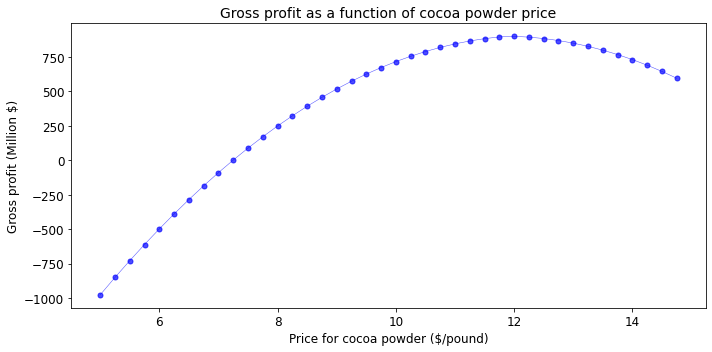

The optimal price to charge is $12.0, resulting in an optimal profit of $899,990,000.


In [7]:
#@markdown Test multiple price points and display the corresponding profits

# run a simple for loop to test multiple values of the price

#@markdown - feel free to change the price values tested (min, max and increment) 
min_price = 5 #@param [5.0, 10.0]
max_price = "15" #@param [10.0, 15.0, 20.0]
price_increment = 0.25 #@param [0.01, 0.05, 0.1, 0.25, 0.5]

min_price = np.float(min_price)
max_price = np.float(max_price)
price_increment = np.float(price_increment)

# generate the test values for the prices
price_test_vals = list(np.arange(min_price,\
                                 max_price,\
                                 price_increment))

# we will calculate the gross profit for every price, so we will store this in a numpy array
SB_profit_vals = np.zeros(len(price_test_vals))

for j in range(len(price_test_vals)):
     SB_profit_vals[j] = calculate_gross_profit(ContractPercent, ContractPrice, OpenMarketPrice, Yield, RoastingCapacity, \
                                                RoastingCostInHouse, FixedCosts, RoastingCostOutsourced, \
                                                DemandIntercept, DemandSlope, Price_Powder = price_test_vals[j])

# plot the dependency
plt.figure(figsize=(10,5)) 
plt.plot(price_test_vals,  SB_profit_vals/1e6, color='blue', linestyle='solid', \
         linewidth=0.5, marker = '.', markersize = 10, alpha = 0.7 )

plt.title( "Gross profit as a function of cocoa powder price", fontsize=14)
plt.xlabel("Price for cocoa powder ($/pound)", fontsize=12)
plt.ylabel("Gross profit (Million $)", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
#ax = plt.gca()
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
plt.show()

# calculate the optimal price and profit
opt_profit = np.max(SB_profit_vals)
opt_price = price_test_vals[np.argmax(SB_profit_vals)]

print("The optimal price to charge is ${}, resulting in an optimal profit of ${:,.0f}.".\
     format(opt_price,opt_profit))

<a id="Q3"></a>
# **Q3.**
Here, we will use scenarios based on historical data to predict potential profit values.

*Expand for details. This section assumes you already ran the section for Q1; if not, please return there and re-run that entire section.*

In [10]:
#@markdown Read the scenario data and display a few scenarios 

#read data into a dataframe
ScenarioInformation = pd.read_csv(local_file_Q3, index_col=0)
scenarios = list(ScenarioInformation.index)

display(ScenarioInformation)

,Probability,Market_price_beans,Yield
Scenario #,,,
1,0.03,0.50,0.85
2,0.04,0.75,0.85
3,0.05,1.00,0.85
4,0.12,1.25,0.85
5,0.12,1.50,0.85
6,0.13,1.75,0.85
7,0.12,2.00,0.90
8,0.17,2.25,0.90
9,0.11,2.50,0.90


In [11]:
#@markdown Calculate and display the gross profits for every scenario, and the average
SB_profit_vals = np.zeros(len(scenarios))

print("Scenario: \tProfit value:")
for i in range(len(scenarios)):
  s = scenarios[i]
  open_m_price_val = ScenarioInformation["Market_price_beans"][s]
  yield_val = ScenarioInformation["Yield"][s]
  SB_profit_vals[i] = \
  calculate_gross_profit(ContractPercent, ContractPrice, \
                         OpenMarketPrice=open_m_price_val, \
                         Yield=yield_val,\
                         RoastingCapacity = RoastingCapacity,\
                         RoastingCostInHouse = RoastingCostInHouse, \
                         FixedCosts = FixedCosts, \
                         RoastingCostOutsourced = RoastingCostOutsourced, \
                         DemandIntercept = DemandIntercept, \
                         DemandSlope = DemandSlope, \
                         Price_Powder = Price_Powder)
  print("{}\t\t{:,.0f}".format(s, SB_profit_vals[i]))

# calculate average
print("The expected (weighted average) profit is: {:,.0f}.".\
      format(sum(SB_profit_vals[i] * ScenarioInformation["Probability"][scenarios[i]] \
                 for i in range(len(scenarios)))))

Scenario: 	Profit value:
1		976,770,000
2		950,432,500
3		924,095,000
4		897,757,500
5		871,420,000
6		845,082,500
7		865,830,000
8		841,105,000
9		816,380,000
10		791,655,000
11		766,930,000
The expected (weighted average) profit is: 858,469,475.


<a id="Q4"></a>
# **Q4.**
Next, we study the dependency of the gross profit on the volume of beans purchased in the contract, and on the open market price.

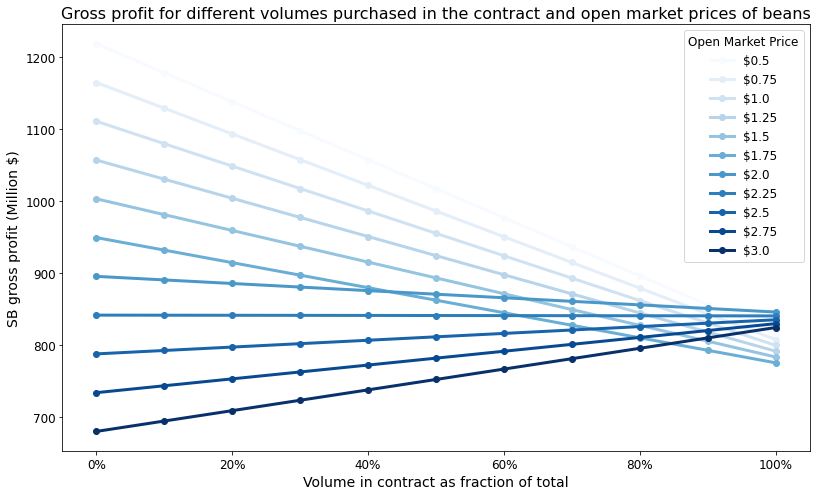

In [12]:
#@markdown Determine and plot the dependency
ScenarioInformation = pd.read_csv(local_file_Q6, index_col=0)
scenarios = list(ScenarioInformation.index)

# use 'arange' function from numpy to generate the test values for the percent in the contract
percent_increment = 0.1 # increments of 10% (0.1) for the percentage in contract
percentage_test_vals = np.arange(0,1 + percent_increment, percent_increment)

# calculate the gross profits and revenues for every price
SB_profit_vals = np.zeros((len(percentage_test_vals),len(scenarios)))

for p in range(len(percentage_test_vals)):
    for i in range(len(scenarios)):
      # determine the correct volume in the contract
      perc_contract_val = percentage_test_vals[p]

      # determine the correct values for open market price and yield
      s = scenarios[i]
      open_m_price_val = ScenarioInformation["Market_price_beans"][s]
      yield_val = ScenarioInformation["Yield"][s]

      # calculate coresponding gross profit
      SB_profit_vals[(p,i)] = \
      calculate_gross_profit(ContractPercent=perc_contract_val, \
                             ContractPrice=ContractPrice, \
                             OpenMarketPrice=open_m_price_val, \
                            Yield=yield_val,\
                            RoastingCapacity = RoastingCapacity,\
                            RoastingCostInHouse = RoastingCostInHouse, \
                            FixedCosts = FixedCosts, \
                            RoastingCostOutsourced = RoastingCostOutsourced, \
                            DemandIntercept = DemandIntercept, \
                            DemandSlope = DemandSlope, \
                            Price_Powder = Price_Powder)

# a single plot for everything
fig, ax1 = plt.subplots(figsize=(12,7))

# do one plot for every value of the open market price
blues = mpl.cm.get_cmap("Blues")
ax1.set_prop_cycle('color',[blues(i) for i in np.linspace(0, 1, len(percentage_test_vals))])
for i in range(len(scenarios)):
    plt.plot(percentage_test_vals*100, SB_profit_vals[:,i]/1e6, linestyle='-', linewidth=3, marker = 'o' )

plt.xlabel("Volume in contract as fraction of total", fontsize=14)
plt.ylabel("SB gross profit (Million $)", fontsize=14)
plt.title("Gross profit for different volumes purchased in the contract and open market prices of beans", \
          fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter())

legend_labels = [ "$" + str(ScenarioInformation["Market_price_beans"][s]) for s in scenarios ]
plt.legend(legend_labels, fontsize=12, title='Open Market Price', \
           title_fontsize=12)
plt.tight_layout()

# uncomment next line to calculate expected profits
# np.dot(SB_profit_vals,ScenarioInformation["Probability"][:])